<a href="https://colab.research.google.com/github/thinkGrow/Neural-Network-CSC424/blob/main/nn_2a_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

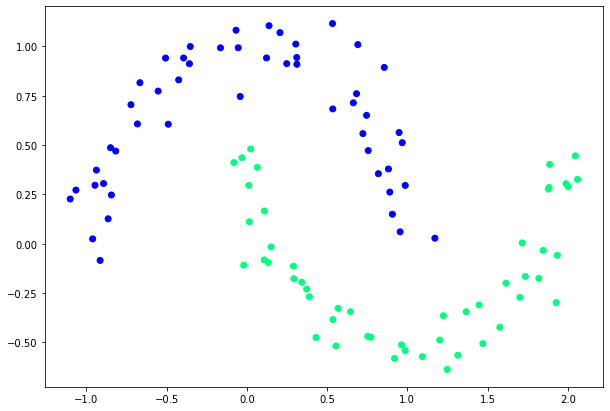

In [ ]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

np.random.seed(0)
feature_set, labels = datasets.make_moons(100, noise=0.10)
plt.figure(figsize=(10,7)) #(width, height)

#c = color of sequence for color makers
#cmap = cmap name
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap=plt.cm.winter)
labels = labels.reshape(100,1)

# print(feature_set.shape)

x_train = np.array(feature_set[:70,:])
x_test  = np.array(feature_set[70:100,:])
y_train = np.array(labels[:70])
y_test = np.array(labels[70:100])

# print(x_train.shape)

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return x*(1-x)

In [ ]:
class NeuralNetwork:
    def __init__(self):
        #random.rand = random values given in a shape.
        self.wh = np.random.rand(len(feature_set[0]),4) #w1 to w8 shape : 2*4
        self.wo = np.random.rand(4, 1) #w9 to w12
        self.lr = 0.5  
        
    
    def train(self, x_train, y_train):
        num_of_iteration=0 
        mul_of_iteration=500
        
        for epoch in range(2000):
            # feedforward
            num_of_iteration += 1
            zh = np.dot(x_train, self.wh) #70*4
            ah = sigmoid(zh)
            zo = np.dot(ah, self.wo) #70*1
            ao = sigmoid(zo) 
            
            error_out = ( 0.5 * (np.power((ao - y_train), 2))) 
            #prints out error after every mul_of_iteration-th iteration
            if num_of_iteration%mul_of_iteration==0 : 
                print( f'Iteration no. {num_of_iteration} : {error_out.sum()}' )

            #local gradients
            dcost_dao = ao - y_train
            dzo_dwo = ah
            dao_dzo = sigmoid_der(ao) 
            dzo_dah = self.wo
            dzh_dwh = x_train
            dah_dzh = sigmoid_der(ah)

            #upstream gradients = downstream gradients * local gradient
            dcost_dzo = dcost_dao * dao_dzo
            dcost_dwo = np.dot(dzo_dwo.T, dcost_dzo)
            dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
            dcost_dzh = dah_dzh * dcost_dah
            dcost_dwh = np.dot(dzh_dwh.T, dcost_dzh)

            # Update Weights ================
            self.wh -= self.lr * dcost_dwh
            self.wo -= self.lr * dcost_dwo
            
            
    def predict(self, x_test):
        # feedforward
        zh = np.dot(x_test, self.wh)
        ah = sigmoid(zh)

        zo = np.dot(ah, self.wo)
        ao = sigmoid(zo)            
        return ao
        

nn = NeuralNetwork()
nn.train(x_train,y_train)

Iteration no. 500 : 3.664773037229361
Iteration no. 1000 : 3.6775425251644607
Iteration no. 1500 : 3.6768499622465494
Iteration no. 2000 : 3.6765035773820647


In [ ]:
#test
y_predict = nn.predict(x_test)

#binary classification
y_predict = np.where(y_predict<0.5, 0, 1 )
'''what np.where does : 
    if score < 0.5 : label 0  
    else : label 1  ''';

In [ ]:
#Accuracy
import pandas as pd
from sklearn.metrics import accuracy_score

y_test = y_test.ravel()
y_predict = y_predict.ravel()

print(f' Test Accuracy : { accuracy_score(y_test, y_predict) }')

 Test Accuracy : 1.0


### Plot


In [ ]:
# feature set column 1 = x-axis
# feature set column 2 = y-axis
# labels = z-axis

x_train_coord = x_train[:,0]    #(70,)
y_train_coord = x_train[:,1]    #(70,)
z_train_coord = y_train.ravel() #(70,)

x_test_coord = x_test[:,0]    #(30,)
y_test_coord = x_test[:,1]    #(30,) 
z_test_coord = y_test.ravel() #(30,)

In [ ]:
x_mesh, y_mesh = np.meshgrid(np.arange(-1,2.5,0.25), np.arange(-1.5,1.5,.01)) #x_mesh.shape, y_mesh.shape = (7*7) in terms of cartesian coords
x_mesh_reshaped = x_mesh.reshape(-1,1) #convert to column vector
y_mesh_reshaped = y_mesh.reshape(-1,1) #convert to column vector

x_test = np.hstack((x_mesh_reshaped,y_mesh_reshaped)) #features
y_test = nn.predict(x_test) #predicted labels
z_mesh = y_test.reshape(x_mesh.shape) #perspective of cartesian coords
#Y_test is an array(column vector) of labels,

In [ ]:
print('x_mesh=',x_mesh.shape)
print('y_mesh=',y_mesh.shape)
print('z_mesh=',z_mesh.shape)
print('x_mesh_reshaped=',x_mesh_reshaped.shape)
print('y_mesh_reshaped=',y_mesh_reshaped.shape)
print('x_test=',x_test.shape)
print('y_test=',y_test.shape)
print('x_test_coord=',x_test_coord.shape)
print('y_test_coord=',y_test_coord.shape)
print('z_test_coord=',z_test_coord.shape)

x_mesh= (300, 14)
y_mesh= (300, 14)
z_mesh= (300, 14)
x_mesh_reshaped= (4200, 1)
y_mesh_reshaped= (4200, 1)
x_test= (4200, 2)
y_test= (4200, 1)
x_test_coord= (30,)
y_test_coord= (30,)
z_test_coord= (30,)


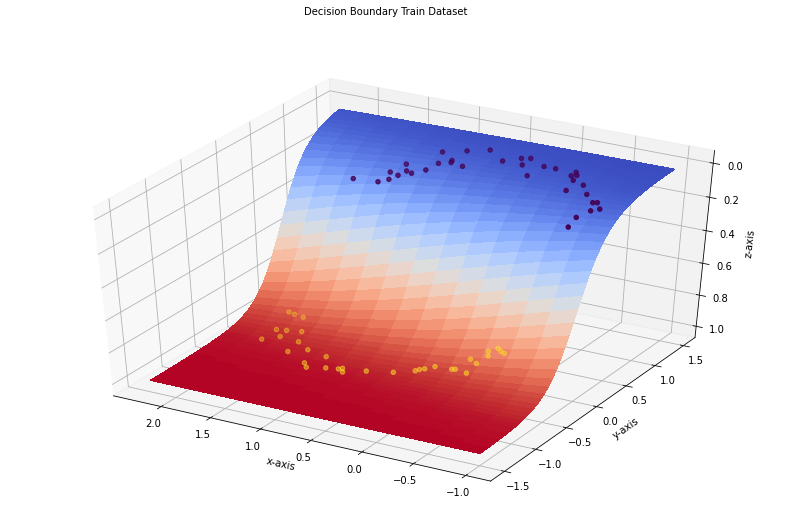

In [ ]:
%matplotlib inline

from matplotlib import cm
fig = plt.figure(figsize=(14,8));
ax = plt.axes(projection='3d');
# ax = plt.axes(projection='3d', proj_type = 'ortho');

ax.set_xlabel("x-axis");
ax.set_ylabel("y-axis");
ax.set_zlabel("z-axis");
fig.suptitle("Decision Boundary Train Dataset", fontsize = 10);

ax.scatter(x_train_coord, y_train_coord, z_train_coord, c=(z_train_coord==1));
ax.view_init(-140, 60);
# ax.view_init(90,0);
# Plot the surface.
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap=cm.coolwarm, linewidth=0, antialiased=False);

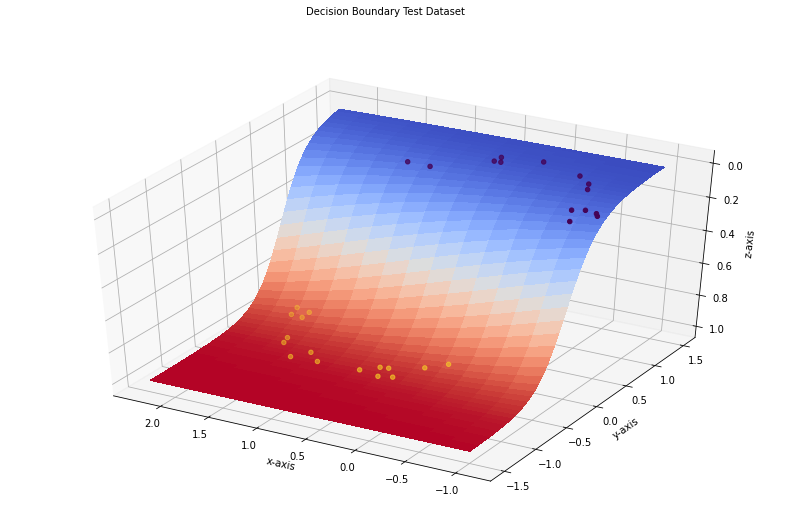

In [ ]:
%matplotlib inline

from matplotlib import cm
fig = plt.figure(figsize=(14,8));
ax = plt.axes(projection='3d');
# ax = plt.axes(projection='3d', proj_type = 'ortho');

ax.set_xlabel("x-axis");
ax.set_ylabel("y-axis");
ax.set_zlabel("z-axis");
fig.suptitle("Decision Boundary Test Dataset", fontsize = 10);

ax.scatter(x_test_coord, y_test_coord, z_test_coord, c=(z_test_coord==1));
ax.view_init(-140, 60);
# ax.view_init(90,0);
# Plot the surface.
surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap=cm.coolwarm, linewidth=0, antialiased=False);